In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import  accuracy_score
from sklearn.tree import plot_tree


In [2]:
df=pd.read_csv("shop_data.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [11]:
df.shape

(12330, 31)

<Axes: xlabel='Month', ylabel='Revenue'>

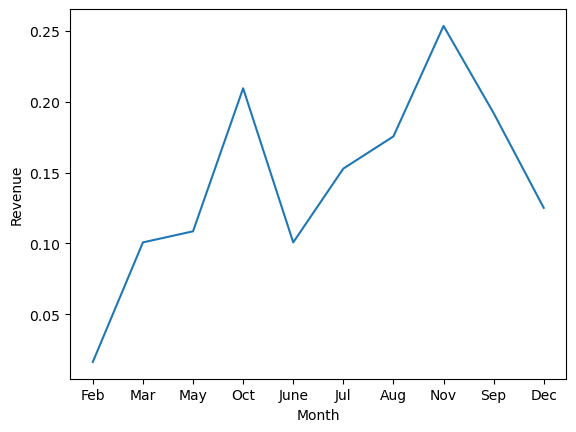

In [4]:

fig,ax=plt.subplots()
sns.lineplot(
    data=df,
    x="Month",
    y="Revenue",
    ax=ax,
    errorbar=None
)


<Axes: xlabel='Region', ylabel='Revenue'>

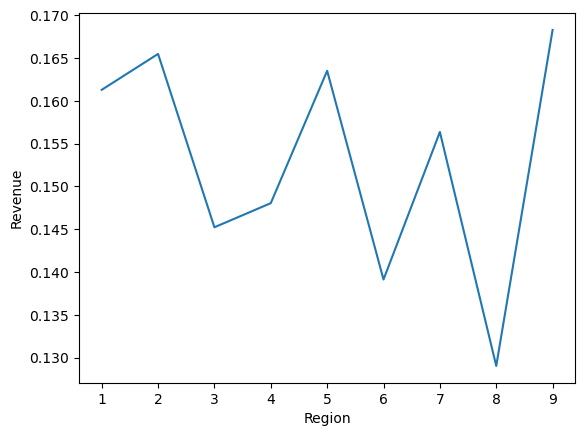

In [5]:
fig,ax=plt.subplots()
sns.lineplot(
    data=df,
    x="Region",
    y="Revenue",
    ax=ax,
    errorbar=None
)


In [7]:
le=LabelEncoder()

df["Weekend"]=le.fit_transform(df["Weekend"])
df["Revenue"]=le.fit_transform(df["Revenue"])

cols = ['VisitorType', 'Month','SpecialDay']
df = pd.get_dummies(df, columns=cols, drop_first=True)

In [8]:
X=df.drop("Revenue",axis=1)
y=df["Revenue"]

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(
    n_estimators=401,
    oob_score=True
)

rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print(" test_accuracy score : ",accuracy_score(y_test,y_pred))
print(" OOB score : ",rf.oob_score_)

 test_accuracy score :  0.8917274939172749
 OOB score :  0.9073398215733982
